In [12]:
import pandas as pd

df = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045/monitor_1.csv', skiprows=1)
df1 = pd.read_csv('F:/CollisionAvoidance-Carla-DRL-MPC/logs/1709461045/monitor.csv', skiprows=1,)

In [20]:
ep = ep.reset_index()

In [21]:
ep

,index,r,l,t
0,0,6.326943,5,26.773363
1,1,-69.979338,9,42.523335
2,2,6.262953,5,58.544970
3,3,3.184442,4,77.720932
4,4,-70.300334,10,98.199076
...,...,...,...,...
2533,594,384.082118,53,15896.975613
2534,595,373.135966,48,15921.404040
2535,596,419.907719,55,15954.359209
2536,597,342.559070,44,15978.370197


In [14]:
ep = pd.concat([df,df1)

In [23]:
ep

,index,r,l,t
0,0,6.326943,5,26.773363
1,1,-69.979338,9,42.523335
2,2,6.262953,5,58.544970
3,3,3.184442,4,77.720932
4,4,-70.300334,10,98.199076
...,...,...,...,...
2533,594,384.082118,53,15896.975613
2534,595,373.135966,48,15921.404040
2535,596,419.907719,55,15954.359209
2536,597,342.559070,44,15978.370197


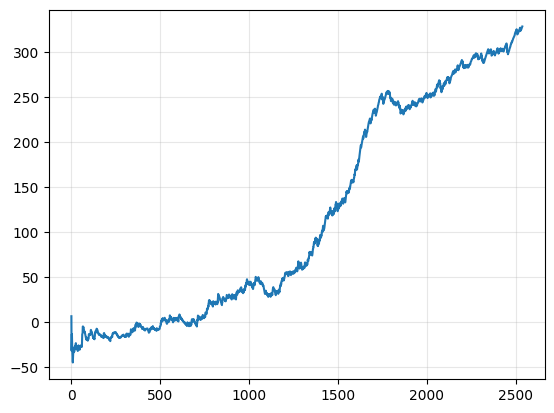

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


smooth = ep.ewm(alpha=(1 - 0.99)).mean()


# plt.plot(df["Value"], alpha=0.4)
plt.plot(smooth["r"])
# plt.ylim(bottom = 0, top=12.5)
plt.grid(alpha=0.3)

plt.show()

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
folder = 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1708371265/evaluation/80m_21.9ms_1.1ttc/'
with open(folder + 'logger.csv', 'r') as file:
    lines = file.readlines()
processed_data = []
for line in lines:
    # Remove quotes and newline characters
    clean_line = line.strip().strip('"')
    records = clean_line.split('","')
    processed_data.append(records)

# # Create DataFrame
# df = pd.DataFrame(processed_data)
# Convert each string to a list
lk = []
for x in processed_data[:]:
    data_lists = [ast.literal_eval(item) for item in x]
    lk.append(data_lists)
# Create a DataFrame
df = pd.DataFrame()
for k in range(len(lk)):
    df = pd.concat([df, pd.DataFrame(lk[k])])
# df.columns = ['Episode','X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
# cols_list = df.columns[1:].tolist()

# # Get unique episodes
# episodes = df['Episode'].unique()

# # Plot X values for each episode
# fig , axes = plt.subplots(12,1,figsize=(14,85))

# for x in cols_list:

#     for episode in episodes:
#         episode_data = df[df['Episode'] == episode]
#         axes[cols_list.index(x)].plot(episode_data[x], label=f'Episode {episode}')
#         axes[cols_list.index(x)].set_title(f"{x} Values by Episode")
#         axes[cols_list.index(x)].set_xlabel("Timestep")
#         axes[cols_list.index(x)].set_ylabel(f"{x}")
#         axes[cols_list.index(x)].legend()
      

# plt.show()


# fig.savefig(fname=folder+'output.png')

FileNotFoundError: [Errno 2] No such file or directory: 'F:/CollisionAvoidance-Carla-DRL-MPC/logs/1708371265/evaluation/80m_21.9ms_1.1ttc/logger.csv'

In [18]:
df.columns = ['Episode', 'des_speed', 'last_v', 'ttc', 'distance_parked', 'timestep', 'X', 'Y', 'X_dist', 'Y_dist', 'Speed', 'Acceleration','acceleration x', 'acceleration y', 'sideslip', 'Yaw', 'Steer']
cols_list = df.columns[1:].tolist()

In [26]:
df1 = df[df['ttc']==0.8]

In [27]:
df2 = df1[df1['last_v']>0]

In [28]:
df2

,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,2,30.0,22.626840,0.8,80,154,-16.893253,-223.485184,0.500000,-80.000000,3.087946,2.000000,-0.000046,-0.000002,-1.000000,1.589615,-0.020856
1,2,30.0,22.626840,0.8,80,499,-16.892624,-223.484619,0.500629,-79.999435,0.203042,2.000000,0.563798,-0.019677,1.000000,1.589610,-0.018013
2,2,30.0,22.626840,0.8,80,173,-16.892487,-223.484512,0.500767,-79.999329,0.243030,1.999999,-0.156675,0.005229,-1.000000,1.589607,-0.014759
3,2,30.0,22.626840,0.8,80,182,-16.892429,-223.484787,0.500824,-79.999603,0.160336,2.000000,0.009000,-0.000783,-1.000000,1.589612,-0.013699
4,2,30.0,22.626840,0.8,80,171,-16.892424,-223.484970,0.500206,-80.000412,0.088518,2.000000,0.020546,-0.000769,-1.000000,1.589614,-0.013714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3,14.0,13.252051,0.8,80,456,-16.299686,-129.472778,1.092852,14.012466,4.999624,0.068453,-0.145320,-0.033607,-0.142625,1.703937,0.010354
153,3,14.0,13.252051,0.8,80,171,-16.334913,-129.225296,1.057625,14.259949,5.000170,0.068527,-0.140280,-0.009203,-0.144027,1.705478,0.010152
154,3,14.0,13.252051,0.8,80,169,-16.370478,-128.977844,1.022060,14.507401,4.998588,0.068552,-0.120662,-0.049591,-0.145292,1.706984,0.009886
155,3,14.0,13.252051,0.8,80,192,-16.406351,-128.730453,0.986187,14.754791,5.000233,0.068680,-0.121517,0.015440,-0.146472,1.708444,0.009526


In [38]:
episode_data = df2[df2['Episode'] == 2]

In [43]:
episode_data['des_speed'].unique()

array([30.  , 19.44, 16.67, 14.  ])

In [63]:
episode_data

,Episode,des_speed,last_v,ttc,distance_parked,timestep,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,2,30.0,22.626840,0.8,80,154,-16.893253,-223.485184,0.500000,-80.000000,3.087946,2.000000,-0.000046,-0.000002,-1.000000,1.589615,-0.020856
1,2,30.0,22.626840,0.8,80,499,-16.892624,-223.484619,0.500629,-79.999435,0.203042,2.000000,0.563798,-0.019677,1.000000,1.589610,-0.018013
2,2,30.0,22.626840,0.8,80,173,-16.892487,-223.484512,0.500767,-79.999329,0.243030,1.999999,-0.156675,0.005229,-1.000000,1.589607,-0.014759
3,2,30.0,22.626840,0.8,80,182,-16.892429,-223.484787,0.500824,-79.999603,0.160336,2.000000,0.009000,-0.000783,-1.000000,1.589612,-0.013699
4,2,30.0,22.626840,0.8,80,171,-16.892424,-223.484970,0.500206,-80.000412,0.088518,2.000000,0.020546,-0.000769,-1.000000,1.589614,-0.013714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,14.0,13.252051,0.8,80,411,-16.316059,-129.317093,1.076479,14.168152,4.990629,0.070472,-0.165654,0.463514,-0.143810,1.705746,0.009465
154,2,14.0,13.252051,0.8,80,201,-16.351576,-129.069855,1.040962,14.415390,4.998155,0.069819,-0.158132,0.129089,-0.145190,1.707188,0.009539
155,2,14.0,13.252051,0.8,80,186,-16.387510,-128.822403,1.005028,14.662842,5.002480,0.069172,-0.157183,0.064287,-0.146652,1.708575,0.009590
156,2,14.0,13.252051,0.8,80,363,-16.423695,-128.575058,0.968843,14.910187,5.001200,0.068711,-0.146108,-0.047541,-0.148166,1.710260,0.009576


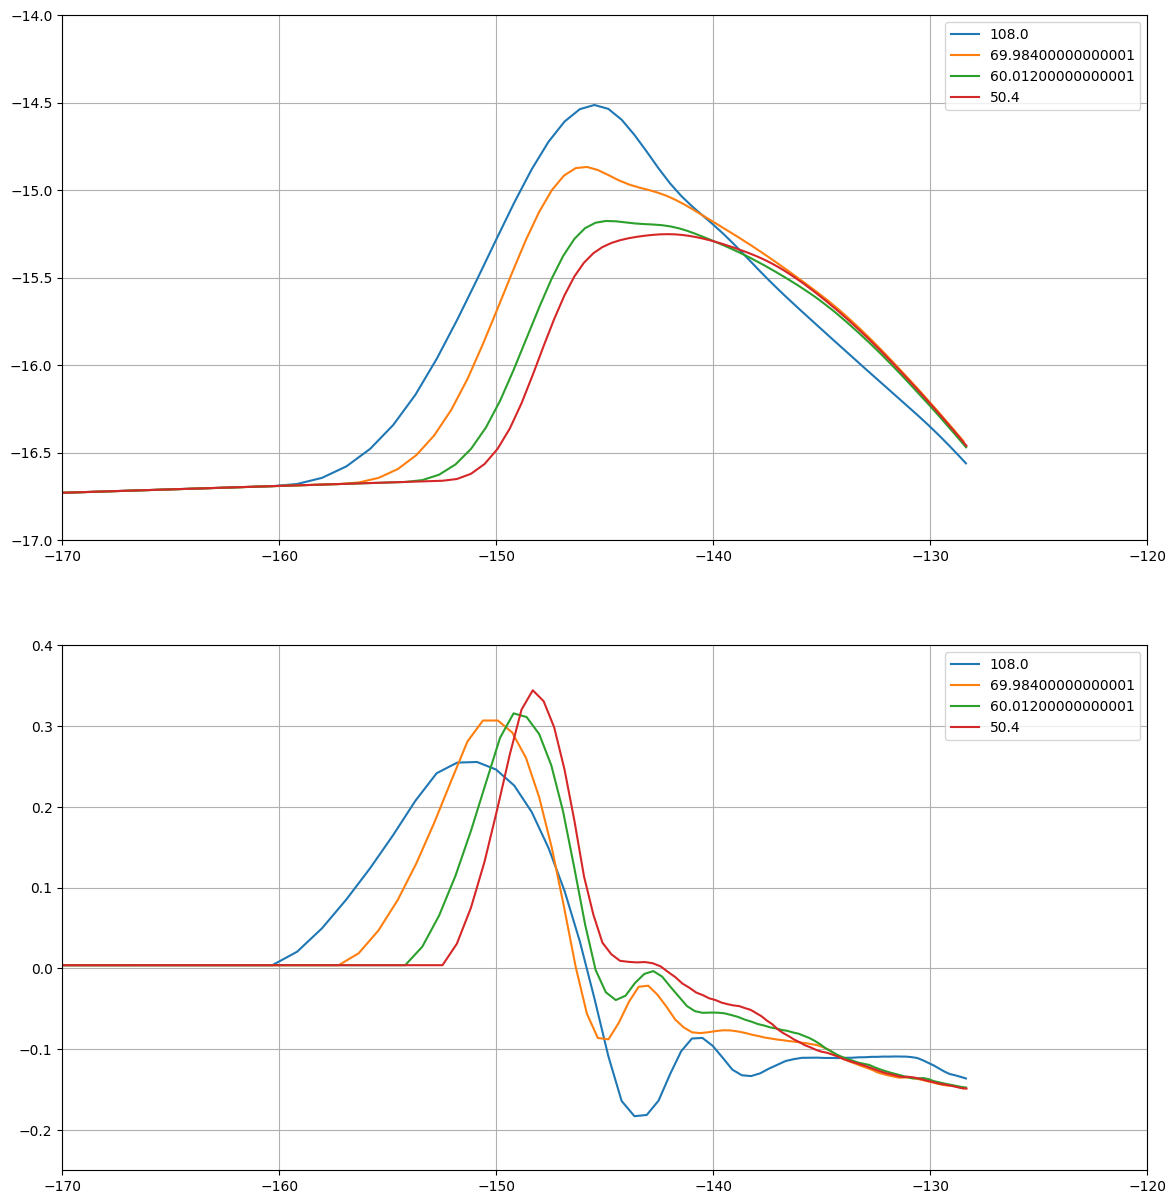

In [71]:
fig , axes = plt.subplots(2,1,figsize=(14,15))

for vec in episode_data['des_speed'].unique():

    df_plot = episode_data[episode_data['des_speed'] == vec]

    axes[0].plot(df_plot['Y'], df_plot['X'],  label=vec*3.6)
    axes[0].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # axes[0].ylabel("y")
    axes[0].set(ylim=(-17,-14))
    axes[0].set(xlim=(-170,-120))
    axes[0].legend()


    axes[1].plot(df_plot['Y'], df_plot['sideslip'],  label=vec*3.6)
    axes[1].grid(True)
    # axes[0].axis("equal")
    # axes[0].xlabel("x")
    # # axes[0].ylabel("y")
    axes[1].set(ylim=(-0.25,0.4))
    axes[1].set(xlim=(-170,-120))
    axes[1].legend()



<Axes: xlabel='Y'>

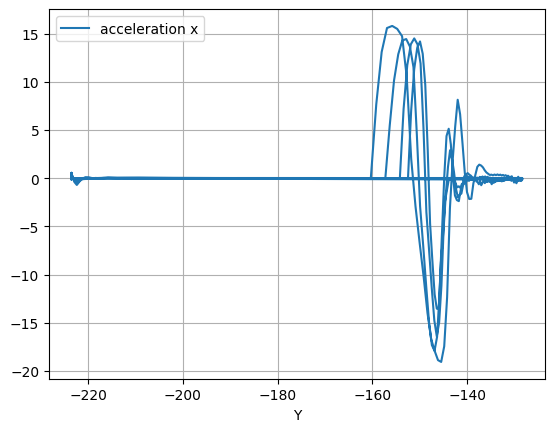

In [32]:
episode_data.plot(x='Y', y='acceleration x', grid=True, legend='des_speed')

In [2]:
episode_data = df[df['Episode'] == 5]

In [7]:
episode_data

,Episode,X,Y,X_dist,Y_dist,Speed,Acceleration,acceleration x,acceleration y,sideslip,Yaw,Steer
0,5,0.000000,0.000000,0.500000,-80.000000,3.087946,2.000000,-0.000046,-0.000002,-1.000000,1.589615,-0.020856
1,5,0.000629,0.000565,0.500629,-79.999435,0.203042,2.000000,0.563798,-0.019677,1.000000,1.589610,-0.018013
2,5,0.000767,0.000671,0.500767,-79.999329,0.243030,1.999999,-0.156742,0.005060,-1.000000,1.589607,-0.014759
3,5,0.000824,0.000397,0.500824,-79.999603,0.160335,2.000000,0.008998,-0.000783,-1.000000,1.589612,-0.013699
4,5,0.000830,0.000214,0.500206,-80.000412,0.088518,2.000000,0.020543,-0.000769,-1.000000,1.589614,-0.013714
...,...,...,...,...,...,...,...,...,...,...,...,...
145,5,0.678143,93.981598,1.177427,13.981659,5.009674,0.068113,-0.046620,-0.025454,-0.154291,1.718319,0.007225
146,5,0.640047,94.228531,1.139332,14.228592,5.002982,0.068068,-0.117680,-0.153856,-0.155689,1.719822,0.007621
147,5,0.601542,94.475616,1.100826,14.475677,5.008327,0.068454,-0.057358,0.099201,-0.156101,1.720764,0.006411
148,5,0.562893,94.722549,1.062178,14.722610,5.002713,0.068298,-0.044597,-0.120716,-0.156729,1.721622,0.006288


<Axes: xlabel='Y'>

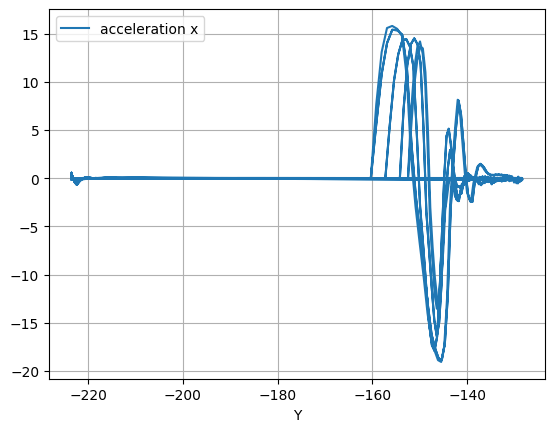

In [4]:
episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])

C:\Users\gusta\AppData\Local\Temp\ipykernel_17768\948111524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_data['Y'] = episode_data['Y'].apply(lambda x: x -episode_data['Y'][0])


In [5]:
episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])

C:\Users\gusta\AppData\Local\Temp\ipykernel_17768\2947286949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_data['X'] = episode_data['X'].apply(lambda x: x -episode_data['X'][0])


<Axes: xlabel='Y'>

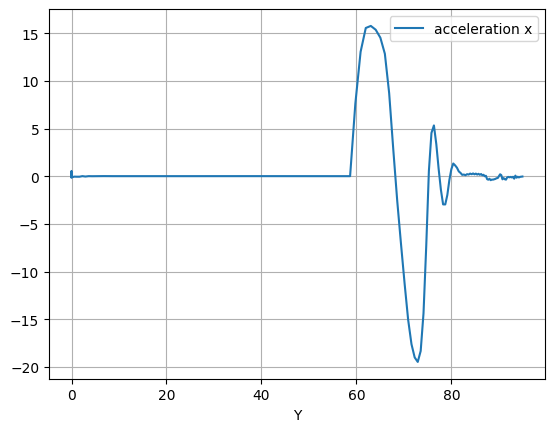

In [10]:
episode_data.plot(x='Y', y='acceleration x', grid=True)

In [1]:
from stable_baselines3 import PPO #PPO

run = '1708371265'
logdir = f"logs/{run}/evaluation/"


In [2]:
model = PPO.load(f"F:/CollisionAvoidance-Carla-DRL-MPC/logs/{run}/best_model.zip", print_system_info=True)

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.22631-SP0 10.0.22631
- Python: 3.8.18
- Stable-Baselines3: 2.2.1
- PyTorch: 2.1.2+cpu
- GPU Enabled: False
- Numpy: 1.24.4
- Cloudpickle: 3.0.0
- Gymnasium: 0.29.1
- OpenAI Gym: 0.26.2



In [3]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=3, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
model.

{'policy': OrderedDict([('log_std', tensor([-0.2688,  0.4064, -0.3416])),
              ('mlp_extractor.policy_net.0.weight',
               tensor([[ 2.1167e-01, -1.9814e-01,  1.5136e-01,  2.9385e-01, -2.5532e-01,
                        -4.5765e-02, -4.8964e-02, -6.6940e-02],
                       [-6.1649e-02,  4.4688e-02,  1.5656e-01, -5.3744e-02,  1.4049e-02,
                         3.1391e-01, -9.2814e-02, -5.4794e-02],
                       [ 3.2236e-01, -1.7667e-01,  2.1447e-02,  1.4322e-01, -4.5781e-01,
                         1.9393e-02,  5.4299e-02,  3.5189e-02],
                       [ 1.7998e-01,  3.9245e-01,  9.3885e-02, -6.5422e-02, -1.1034e-01,
                        -1.3045e-02, -2.5131e-01, -8.8725e-02],
                       [-3.5875e-01, -1.6582e-03,  2.2555e-01,  3.0791e-01, -3.2778e-01,
                        -1.0465e-01, -9.0688e-02,  6.6309e-02],
                       [ 6.0873e-02,  3.5463e-01, -7.7361e-02,  8.4435e-02, -3.4052e-01,
                    